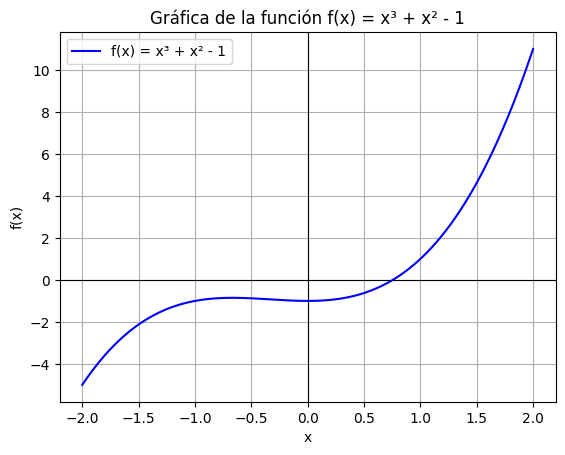


==== MÉTODO DE FALSA POSICIÓN ====
Raíz aproximada: 0.7548776662466927
f(raíz): -1.1102230246251565e-16
Número de iteraciones: 100
Tolerancia usada: 1e-06

==== MÉTODO DE FALSA POSICIÓN MODIFICADA (ILLINOIS) ====
Raíz aproximada: 0.7548773726491742
f(raíz): -9.451712240649002e-07
Número de iteraciones: 19
Tolerancia usada: 1e-06

==== COMPARACIÓN ====
Iteraciones método clásico: 100
Iteraciones método Illinois: 19
Observación: el método Illinois evita el estancamiento, ajustando el extremo que no cambia.


In [1]:
#Metodo de falsa posicion 
import numpy as np
import matplotlib.pyplot as plt

# 1. Definir la función dada
def f(x):
    return x**3 + x**2 - 1

# 2. Graficar la función
x_vals = np.linspace(-2, 2, 400)
y_vals = f(x_vals)

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.plot(x_vals, y_vals, label='f(x) = x³ + x² - 1', color='blue')
plt.title("Gráfica de la función f(x) = x³ + x² - 1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

# 3. Método de Falsa Posición (Regula Falsi)
def falsa_posicion(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        print("El intervalo no tiene cambio de signo.")
        return None, 0

    iteraciones = 0
    while abs(b - a) > tol and iteraciones < max_iter:
        # Fórmula de Regula Falsi
        c = b - f(b) * (a - b) / (f(a) - f(b))

        # Evaluación en c
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteraciones += 1

    return c, iteraciones

# 4. Aplicar el método a la función f(x)
a = 0
b = 1
tolerancia = 1e-6

raiz, num_iter = falsa_posicion(f, a, b, tolerancia)

print("\n==== MÉTODO DE FALSA POSICIÓN ====")
print(f"Raíz aproximada: {raiz}")
print(f"f(raíz): {f(raiz)}")
print(f"Número de iteraciones: {num_iter}")
print(f"Tolerancia usada: {tolerancia}")

# ==========================================
# 5. MÉTODO DE FALSA POSICIÓN MODIFICADA (ILLINOIS)
# ==========================================
def falsa_posicion_modificada(f, a, b, tol=1e-6, max_iter=100):
    fa = f(a)
    fb = f(b)
    iteraciones = 0

    for _ in range(max_iter):
        c = b - fb * (a - b) / (fa - fb)
        fc = f(c)

        if abs(fc) < tol:
            return c, iteraciones + 1

        # Regla modificada (Illinois): si el mismo extremo se mantiene, se ajusta
        if fa * fc < 0:
            b = c
            fb = fc
            fa /= 2
        else:
            a = c
            fa = fc
            fb /= 2

        iteraciones += 1

    return c, iteraciones

# 6. Aplicar el método modificado (Illinois)
raiz_mod, num_iter_mod = falsa_posicion_modificada(f, a, b, tolerancia)

print("\n==== MÉTODO DE FALSA POSICIÓN MODIFICADA (ILLINOIS) ====")
print(f"Raíz aproximada: {raiz_mod}")
print(f"f(raíz): {f(raiz_mod)}")
print(f"Número de iteraciones: {num_iter_mod}")
print(f"Tolerancia usada: {tolerancia}")

# 7. Comparar convergencia
print("\n==== COMPARACIÓN ====")
print(f"Iteraciones método clásico: {num_iter}")
print(f"Iteraciones método Illinois: {num_iter_mod}")
print("Observación: el método Illinois evita el estancamiento, ajustando el extremo que no cambia.")

